<cite>Darryl Oatridge, August 2022<cite>

In [1]:
import os

In [2]:
os.environ['HADRON_PM_PATH'] = '../0_hello_meta/demo/contracts'
os.environ['HADRON_DEFAULT_PATH'] = '../0_hello_meta/demo/data'

In [3]:
from ds_discovery import Wrangle, Transition

In [4]:
# get the instance
wr = Wrangle.from_env('hello_wr', has_contract=False)

In [5]:
source = Transition.from_env('hello_tr').get_persist_contract()
wr.set_source_contract(source)
wr.set_persist()

In [6]:
df = wr.load_source_canonical()

In [7]:
wr.canonical_report(df)

,Attributes (10),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,20.1%,20.1%,1309,99,max=80.0 | min=0.1667 | mean=29.88 | dominant=24.0
1,cabin,string,77.5%,77.5%,1309,187,Sample: C23 C25 C27 | G6 | B57 B59 B63 B66 | F4 | F33
2,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
3,fare,float64,0.1%,4.6%,1309,282,max=512.3292 | min=0.0 | mean=33.3 | dominant=8.05
4,parch,int64,0.0%,76.5%,1309,8,max=9 | min=0 | mean=0.39 | dominant=0
5,pclass,int64,0.0%,54.2%,1309,3,max=3 | min=1 | mean=2.29 | dominant=3
6,sex,category,0.0%,64.4%,1309,2,Sample: male | female
7,sibsp,int64,0.0%,68.1%,1309,7,max=8 | min=0 | mean=0.5 | dominant=0
8,survived,int64,0.0%,61.8%,1309,2,max=1 | min=0 | mean=0.38 | dominant=0
9,ticket,string,0.0%,0.8%,1309,929,Sample: CA. 2343 | 1601 | CA 2144 | PC 17608 | 347077


In [8]:
df['cabin'] = wr.tools.correlate_custom(df, code_str="@['cabin'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)", column_name='cabin')
df['family'] = wr.tools.correlate_aggregate(df, headers=['parch', 'sibsp'], agg='sum', column_name='family')

In [9]:
selection = [wr.tools.select2dict(column='family', condition='@==0')]
df['is_alone'] = wr.tools.correlate_selection(df, selection=selection, action=1, default_action=0, column_name='is_alone')

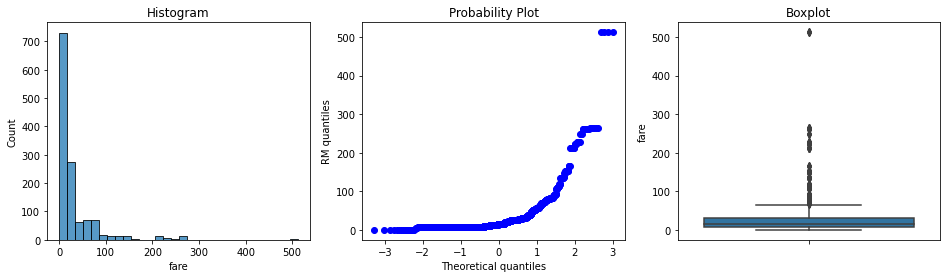

<Figure size 432x288 with 0 Axes>

In [10]:
wr.visual.show_distribution(df, 'fare')

In [11]:
df['fare_outliers'] = wr.tools.correlate_mark_outliers(df, header='fare', column_name='fare_outliers')

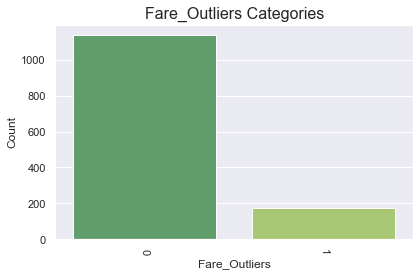

<Figure size 432x288 with 0 Axes>

In [17]:
wr.visual.show_categories(df, 'fare_outliers')

In [13]:
wr.add_column_description('', description="")
wr.add_column_description('', description="")

In [14]:
wr.report_intent()

,level,order,intent,parameters,creator
0,cabin,0,correlate_custom,"[""code_str='@['cabin'].apply(lambda x: x.split()[0] if isinstance(x, str) else np.nan)'"", ""column_name='cabin'"", 'kwargs={}']",doatridge
1,family,0,correlate_aggregate,"[""headers=['parch', 'sibsp']"", ""agg='sum'"", ""column_name='family'""]",doatridge
2,fare_outliers,0,correlate_mark_outliers,"[""header='fare'"", ""column_name='fare_outliers'""]",doatridge
3,is_alone,0,correlate_selection,"[""selection=[{'column': 'family', 'condition': '@==0'}]"", 'action=1', 'default_action=0', ""column_name='is_alone'""]",doatridge


In [15]:
wr.report_column_catalog()

,column_name,description
0,cabin,
1,family,
2,fare_outliers,
3,is_alone,


## Component Pipeline

In [16]:
wr.run_component_pipeline()

In [17]:
wr.canonical_report(wr.load_persist_canonical())

,Attributes (13),dType,%_Null,%_Dom,Count,Unique,Observations
0,age,float64,20.1%,20.1%,1309,99,max=80.0 | min=0.1667 | mean=29.88 | dominant=24.0
1,cabin,object,77.5%,77.5%,1309,182,Sample: F | C23 | G6 | B57 | C78
2,embarked,category,0.0%,69.8%,1309,4,Sample: S | C | Q | nan
3,family,int64,0.0%,60.4%,1309,9,max=10 | min=0 | mean=0.88 | dominant=0
4,fare,float64,0.1%,4.6%,1309,282,max=512.3292 | min=0.0 | mean=33.3 | dominant=8.05
5,fare_outliers,int64,0.0%,86.9%,1309,2,max=1 | min=0 | mean=0.13 | dominant=0
6,is_alone,int64,0.0%,60.4%,1309,2,max=1 | min=0 | mean=0.6 | dominant=1
7,parch,int64,0.0%,76.5%,1309,8,max=9 | min=0 | mean=0.39 | dominant=0
8,pclass,int64,0.0%,54.2%,1309,3,max=3 | min=1 | mean=2.29 | dominant=3
9,sex,category,0.0%,64.4%,1309,2,Sample: male | female
